

### Mini Project Clustering Customer

Pada studi kasus ini, saya akan men-clusterkan customer menggunakan algoritma K-Means yang terdapat dalam suatu mall. Clustering dilakukan menggunakan 2 variabel yaitu variabel pendapatan dan pengeluaran customer.  


# **Import Library**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns  #Python library for Vidualization

#**Read Data**

In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/HafizahIlma/data/main/Mall_Customers.csv')
dataset.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
#total rows and colums in the dataset
dataset.shape

(200, 5)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Missing values computation

In [ ]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Feature selection for the model

Pada studi kasus kali ini hanya menggunakan 2 variabel, yaitu: Annual income dan Spending Score

In [ ]:
#Mengambil hanya 2 fitur (Pendapatan Tahunan dan Skor Pengeluaran) dan Label tidak tersedia
X= dataset.iloc[:, [3,4]].values

## Membangun Model

Algoritma KMeans untuk menentukan jumlah cluster yang optimal , KMeans menggunakan Metode Elbow


In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# **Visualizing the ELBOW method to get the optimal value of K**

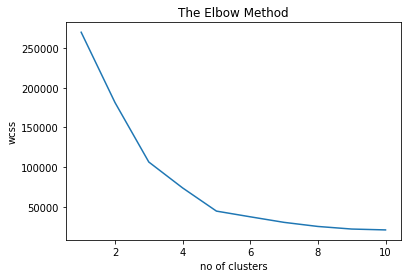

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

## **Visualizing all the clusters**

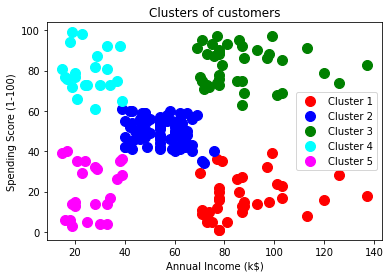

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## **Model Interpretation**

*   Cluster 1 (Red Color): Penghasilan tinggi tetapi pengeluaran lebih sedikit
*   Cluster 2 (Blue Color): Rata-rata dalam hal penghasilan dan pengeluaran
*   Cluster 3 (Green Color): Penghasilan tinggi dan juga pengeluaran tinggi [SET TARGET]
*   Cluster 4 (Cyan Color): Penghasilan lebih sedikit tetapi pengeluaran lebih banyak
*   Cluster 5 (Magenta Color): Penghasilan lebih sedikit, pengeluaran lebih sedikit

Insight: dapat menempatkan Cluster 3 ke dalam beberapa sistem peringatan di mana email dapat dikirim kepada mereka setiap hari karena ini mudah untuk berkomunikasi. Sedangkan yang lain bisa kita atur seperti seminggu sekali atau sebulan sekali.

## CLUSTERING MENGGUNAKAN DATASET IRIS

In [ ]:
iris = sns.load_dataset("iris")
iris.head(50)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.info()
#semua data lengkap

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isnull().sum()
# Tidak ada nilai null

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
#Mengambil 4 fitur
X= iris.iloc[:, :4].values

In [ ]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

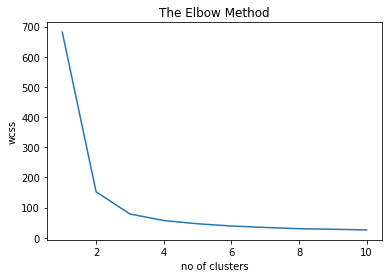

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
#Model Build
#dari elbow, didapat k optimalnya ialah 3, sehingga k=3
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

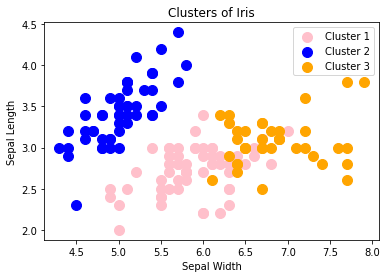

In [ ]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'orange', label = 'Cluster 3')

plt.title('Clusters of Iris')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.legend()
plt.show()